### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sys
import numpy as np
import joblib

### Configuration

#### Constants

In [4]:
SEED=42
SOURCE_FILE = "../data_preprocessed/everything40_cleaned_normalized_reduced.csv"
VERBOSE = True

APPLY_SAMPLE_CUT_OFF = False
LIMIT_SAMPLES = 50 # sample cells
LIMIT_FEATURES = 500 # sample genes

np.random.seed(42) 

#### Helper functions

In [6]:
from collections import Counter

def visualizeResults(result, title):
    frequency = Counter(result)

    labels = list(frequency.keys())
    sizes = list(frequency.values())

    plt.figure(figsize=(14, 6))
    plt.bar(labels, sizes, color='skyblue')
    plt.xlabel('Genes')
    plt.ylabel('Frequency')
    plt.title('Frequency of each cell class for: ' + title)
    plt.xticks(rotation=90) 
    plt.show()

### Load dataset

In [7]:
%%time
dataset = pd.read_csv(SOURCE_FILE, index_col = 0)

if APPLY_SAMPLE_CUT_OFF:
    print("Applying cut off: ", LIMIT_SAMPLES, LIMIT_FEATURES)
    print("Before cut off: ", dataset.shape)
    dataset = dataset.iloc[0:LIMIT_SAMPLES, dataset.shape[1]-LIMIT_FEATURES:]
    print("After cut off: ", dataset.shape)

CPU times: total: 156 ms
Wall time: 188 ms


In [8]:
print("Total samples: ", dataset.shape[0])
print("Total genes  : ", dataset.shape[1])

Total samples:  4679
Total genes  :  139


In [9]:
X = dataset.iloc[:, :-1]

In [10]:
print(X.shape)

(4679, 138)


### Predict with each model

#### Linear regression

##### Load model

In [11]:
loaded_model = joblib.load('../models/logistic_regression_model.pkl')

print(loaded_model)

LogisticRegression(C=0.1)


##### Predict example

In [12]:
%%time

result = loaded_model.predict(X)

CPU times: total: 0 ns
Wall time: 84.4 ms


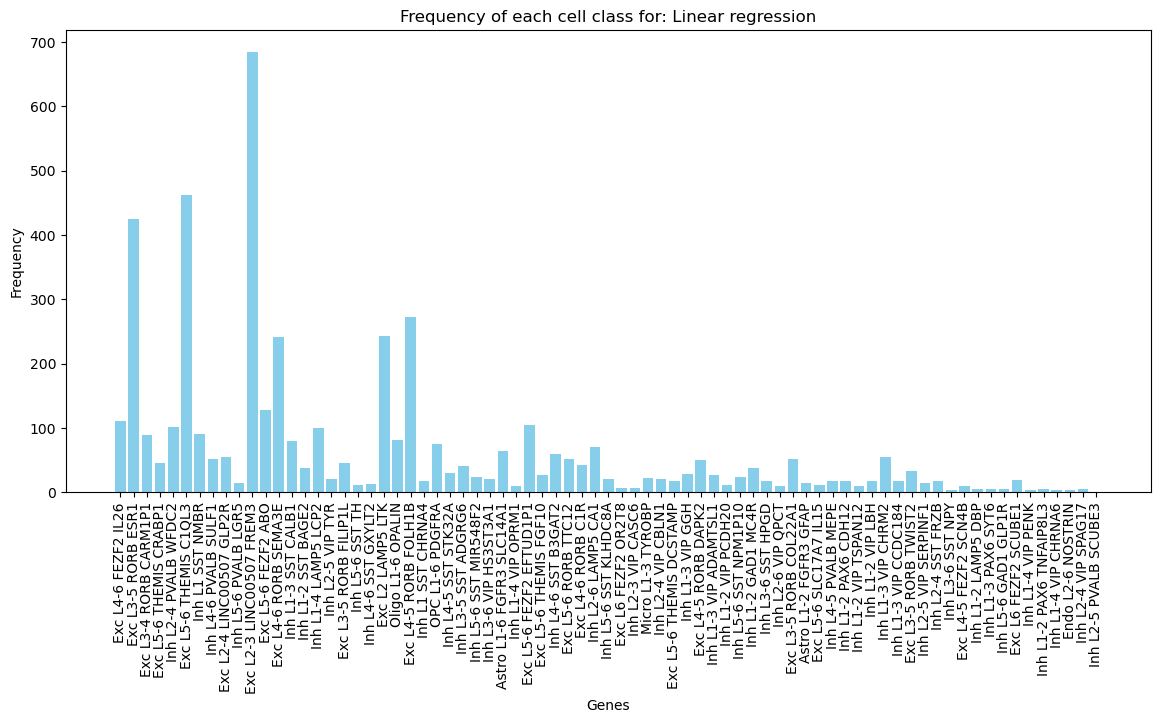

In [13]:
visualizeResults(result, 'Linear regression')


#### Random forest

##### Load model

In [14]:
loaded_model = joblib.load('../models/random_forest_model.pkl')

print(loaded_model)

RandomForestClassifier(n_estimators=500)


##### Predict example

In [15]:
%%time

result = loaded_model.predict(X)

CPU times: total: 1.06 s
Wall time: 1.59 s


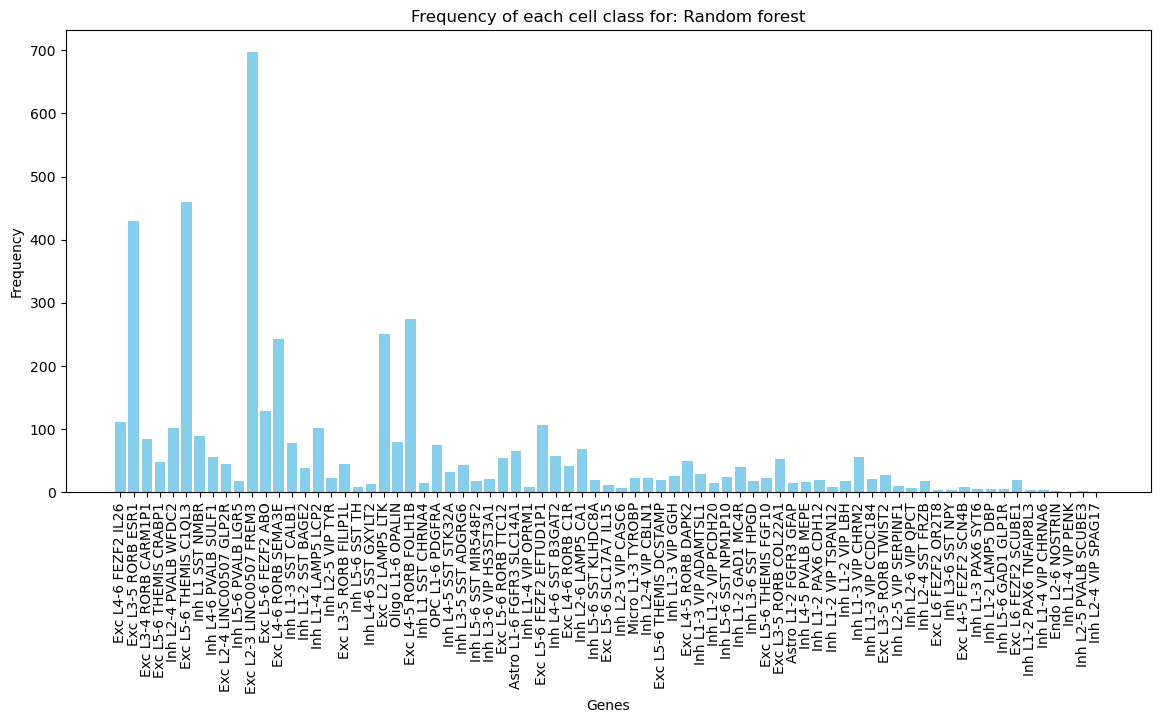

In [16]:
visualizeResults(result, 'Random forest')

#### k-Nearest Neighbors

##### Load model

In [17]:
loaded_model = joblib.load('../models/k_nearest_neighbors.pkl')

print(loaded_model)

KNeighborsClassifier(weights='distance')


##### Predict example

In [18]:
%%time

loaded_model.predict(X)

CPU times: total: 297 ms
Wall time: 383 ms


array(['Exc L4-6 FEZF2 IL26', 'Exc L3-5 RORB ESR1',
       'Exc L3-4 RORB CARM1P1', ..., 'Exc L3-5 RORB ESR1',
       'Exc L2-3 LINC00507 FREM3', 'Exc L4-6 RORB SEMA3E'], dtype=object)

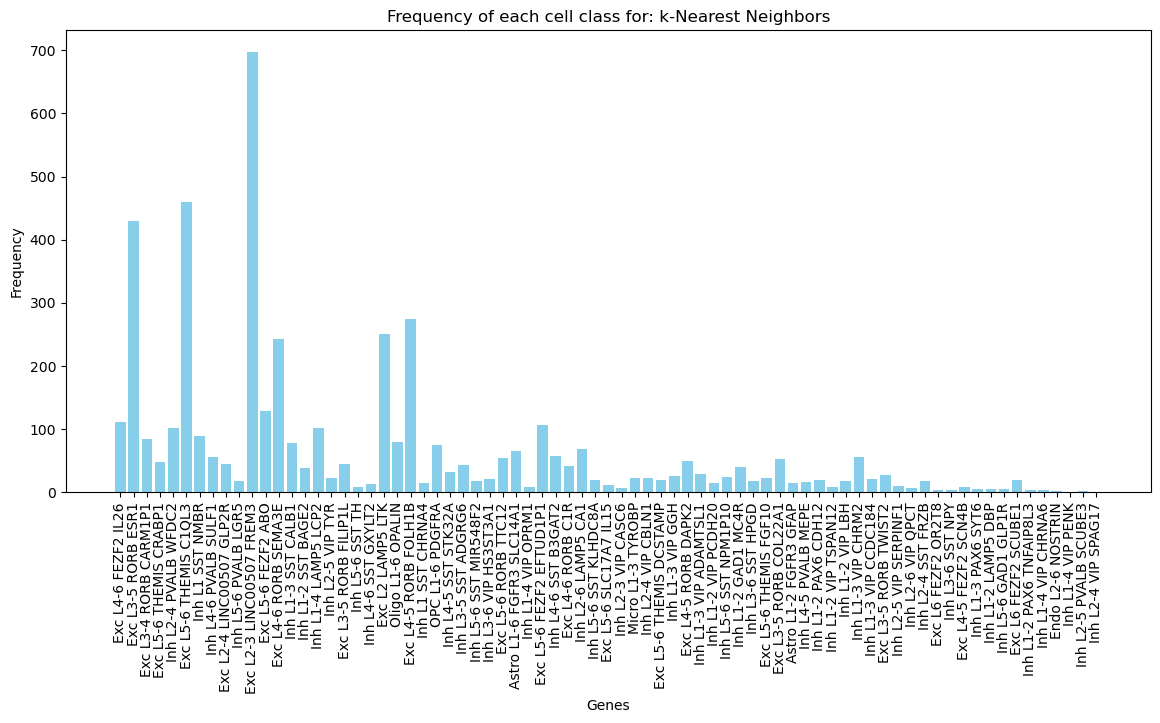

In [19]:
visualizeResults(result, 'k-Nearest Neighbors')

#### Linear Discriminant Analysis

##### Load model

In [20]:
loaded_model = joblib.load('../models/linear_discriminant_analysis.pkl')

print(loaded_model)

LinearDiscriminantAnalysis(tol=1e-10)


##### Predict example

In [21]:
%%time

loaded_model.predict(X)

CPU times: total: 31.2 ms
Wall time: 8.02 ms


array(['Exc L4-6 FEZF2 IL26', 'Exc L3-5 RORB ESR1',
       'Exc L3-4 RORB CARM1P1', ..., 'Exc L3-5 RORB ESR1',
       'Exc L2-3 LINC00507 FREM3', 'Exc L4-6 RORB SEMA3E'], dtype='<U24')

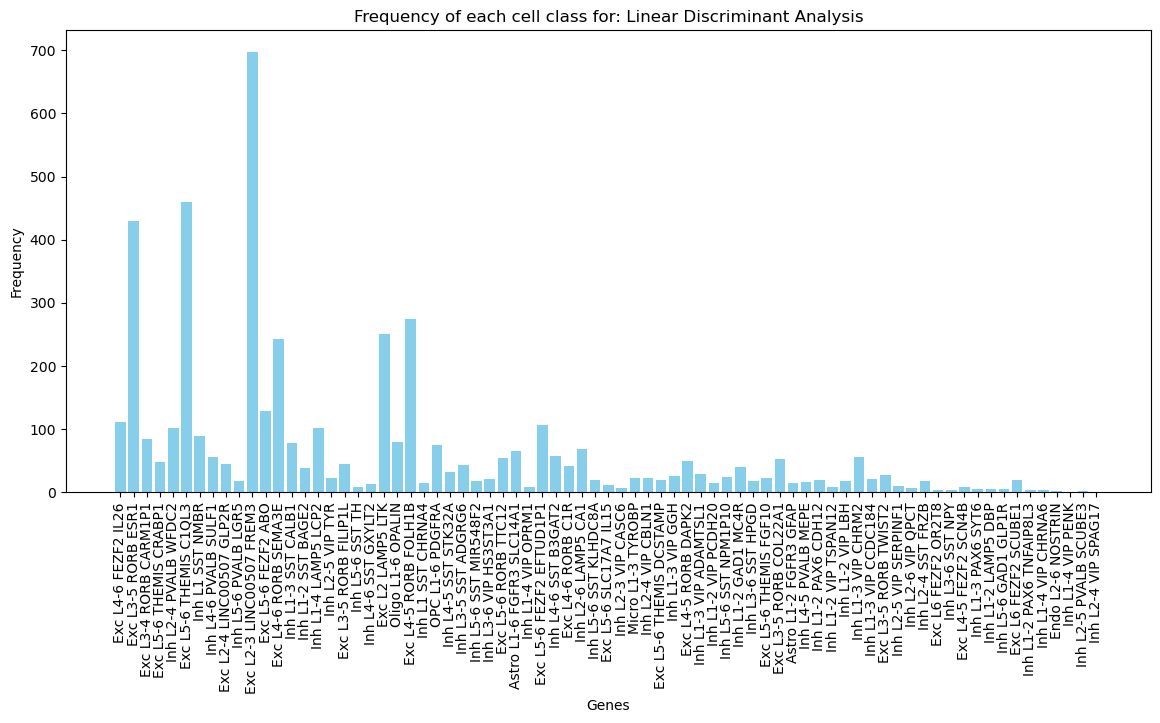

In [22]:
visualizeResults(result, 'Linear Discriminant Analysis')

#### Support Vector Machines

##### Load model

In [23]:
loaded_model = joblib.load('../models/support_vector_machines.pkl')

print(loaded_model)

SVC(C=0.5, kernel='linear', probability=True)


##### Predict example

In [24]:
%%time

loaded_model.predict(X)

CPU times: total: 875 ms
Wall time: 1.82 s


array(['Exc L4-6 FEZF2 IL26', 'Exc L3-5 RORB ESR1',
       'Exc L3-4 RORB CARM1P1', ..., 'Exc L3-5 RORB ESR1',
       'Exc L2-3 LINC00507 FREM3', 'Exc L4-6 RORB SEMA3E'], dtype=object)

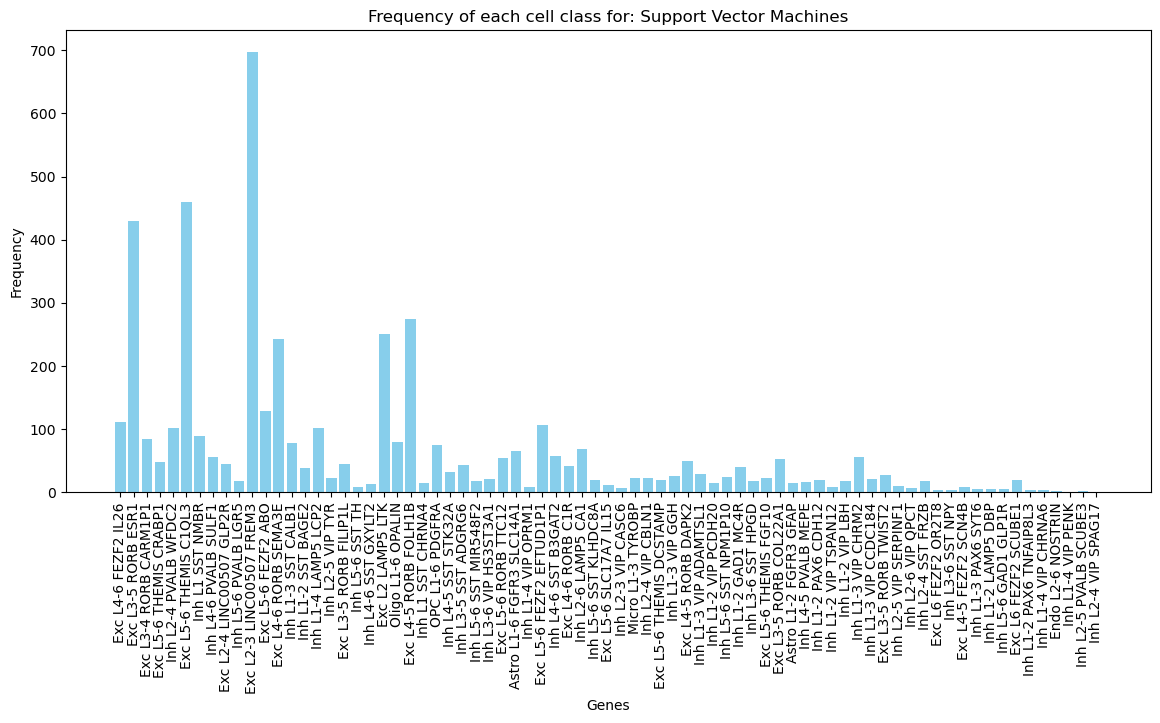

In [25]:
visualizeResults(result, 'Support Vector Machines')